[[580. 512.]
 [605. 510.]
 [624. 511.]
 [646. 511.]
 [663. 512.]
 [675. 515.]
 [694. 514.]]
lArrayNeg:  [1.02459211 1.02756637 1.03050335 1.03316338 1.03574425 1.03791044
 1.03986864 1.04163404 1.04478315 1.04625607 1.0476151  1.04886344
 1.04964031 1.05019576 1.05042988 1.0504095  1.05075326 1.05151436
 1.05287168 1.05160181 1.05030368 1.04894809 1.04760842 1.04706591
 1.04652344 1.04655165 1.04722887 1.04854444 1.05252611 1.05440019
 1.05731493 1.06039201 1.06358739 1.06735355 1.0711797 ]
rArrayNeg:  [0.03899406 0.04269558 0.04641568 0.05014227 0.05388271 0.05761748
 0.0613544  0.06509218 0.06733351 0.07107691 0.07482158 0.07856652
 0.08228224 0.08598424 0.08966164 0.09331696 0.09700877 0.10073749
 0.10292227 0.10645496 0.10997457 0.11347761 0.11697162 0.12054668
 0.12411651 0.12775072 0.13146505 0.13526482 0.13782475 0.14172247
 0.14577492 0.14986871 0.15399909 0.15823431 0.16250273]
dArrayNeg:  [0.36769429 0.36769429 0.36769429 0.36769429 0.36769429 0.36769429
 0.36769429 0.3676942

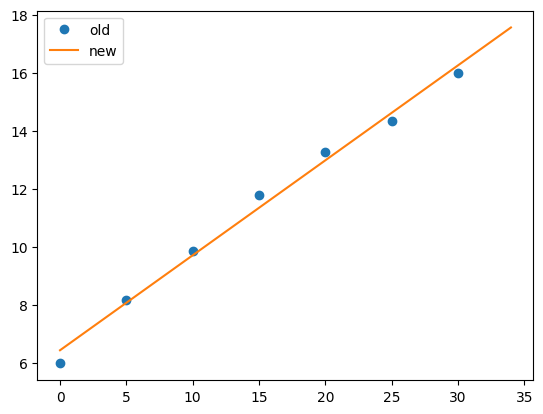

<Figure size 640x480 with 0 Axes>

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *
from scipy import signal
from scipy.optimize import curve_fit
from scipy.optimize import fsolve


epsilonArray = np.load('output/outputEpsilon.npy')
xiPrimeNegArray = np.load('output/outputXiNeg.npy')
xiPrimePosArray = np.load('output/outputXiPos.npy')
centerArray = np.load('output/outputCenter.npy',allow_pickle=True)
print(centerArray)
radiusArray = np.load('output/outputRadius.npy')

rArrayPos = np.zeros(len(centerArray))
rArrayNeg = np.zeros(len(centerArray))

lArrayPos = np.zeros(len(centerArray))
lArrayNeg = np.zeros(len(centerArray))

epsilonPrimeArray = np.zeros(len(centerArray))

for i in range(len(centerArray)):

    xValue, yValue = centerArray[i][0], centerArray[i][1]
    xValue = xValue - 512
    yValue = yValue - 512

    xValue = xValue*45/512
    yValue = yValue*45/512

    epsilonPrimeArray[i] = np.sqrt(xValue**2 + yValue**2)

def linearFunc( x, m, b):
    return m*x + b

parameters, covariance = curve_fit(linearFunc, np.arange(15,50,5), epsilonPrimeArray)
epsilonPrimeArrayNew = linearFunc(np.arange(15,50), *parameters)

plt.figure()
plt.plot(np.arange(0,35,5),epsilonPrimeArray, 'o', label='old')
plt.plot(np.arange(0,35),epsilonPrimeArrayNew, '-', label='new')
plt.legend()
plt.figure()

    
rArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
rArrayPos = np.zeros(len(epsilonPrimeArrayNew))
lArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
lArrayPos = np.zeros(len(epsilonPrimeArrayNew))
dArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
dArrayPos = np.zeros(len(epsilonPrimeArrayNew))

# for positive xi
for i in range(len(epsilonPrimeArrayNew)):

    xi = xiPrimePosArray[i]
    epsilon = epsilonArray[i]
    epsilonPrime = epsilonPrimeArrayNew[i]

    chi = 180 - epsilon - (90 - xi)
    s = np.sin(np.pi/2-np.deg2rad(xi))/np.sin(np.deg2rad(chi))
    r = s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    l = np.sqrt(r**2 + s**2)
    d = np.sqrt(l**2 + 1**2 - 2*l*1*np.cos(np.deg2rad(epsilonPrime)))

    rArrayPos[i] = r
    lArrayPos[i] = l
    dArrayPos[i] = d

    # theta = 90 - xiPrimePosArray[i]
    # epsilon = epsilonArray[i]
    # chi = 180 - epsilon - theta
    # s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    # epsilonPrime = epsilonPrimeArrayNew[i]

    # r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    # rArrayPos[i] = r

    # l = np.sqrt(r**2 + s**2)
    # lArrayPos[i] = l

for i in range(len(epsilonPrimeArrayNew)):

    xi = xiPrimeNegArray[i]
    epsilon = epsilonArray[i]
    epsilonPrime = epsilonPrimeArrayNew[i]

    chi = 180 - epsilon - (90 - xi)
    s = np.sin(np.pi/2-np.deg2rad(xi))/np.sin(np.deg2rad(chi))
    r = s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    l = np.sqrt(r**2 + s**2)

    rArrayNeg[i] = r
    lArrayNeg[i] = l
    dArrayNeg[i] = d

    # theta = 90 - xiPrimeNegArray[i]
    # epsilon = epsilonArray[i]
    # chi = 180 - epsilon - theta
    # s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    # epsilonPrime = epsilonPrimeArrayNew[i]
    
    # r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    # rArrayNeg[i] = r

    # l = np.sqrt(r**2 + s**2)
    # lArrayNeg[i] = l



print("lArrayNeg: ",lArrayNeg)
print("rArrayNeg: ",rArrayNeg)
print("dArrayNeg: ",dArrayNeg)
print("xiPrimeNegarray", xiPrimeNegArray)

print("lArrayPos: ",lArrayPos)
print("rArrayPos: ",rArrayPos)
print("dArrayPos: ",dArrayPos)
print("xiPrimePosarray", xiPrimePosArray)

print("epsilonArray: ", epsilonArray)


In [2]:
def trueXi(l, r, d, xiPrime):
    
    theta = np.arccos(r/l) + np.arccos((d**2 + l**2 - 1**2)/(2*l*d)) - np.pi

    return np.rad2deg(r*theta/(r+d)) + xiPrime

    # d = np.sqrt(l**2 + 1 - 2*l*np.cos(np.deg2rad(epsilon)))

    # chiPrime = np.rad2deg(np.arccos((l**2 + d**2 - 1)/(2*l*d)))

    
    # func = lambda xi :  -xiPrime + xi + r/(r+d)*(180 - chiPrime- np.rad2deg(np.arccos(r/l)))
    # sol = fsolve(func, xiPrime)

    # print("d: ", d)
    # print("l: ", l)
    # print("r: ", r)
    # print("epsilon: ", epsilon)
    # print("xiPrime: "   , xiPrime)
    # print("func(sol) = " , func(sol))
    # print("xi: ", sol)
    # if(xiPrime == sol):
    #     return np.nan
    # return sol



xiNegarray = np.zeros(35)
xiPosarray = np.zeros(35)

print("xiPrimeNegArray: ", xiPrimeNegArray)
print("xiPrimePosArray: ", xiPrimePosArray)

for i in range(35):
    if np.isnan(xiPrimeNegArray[i]) or np.isnan(xiPrimePosArray[i]):
        xiNegarray[i] = np.nan
        xiPosarray[i] = np.nan
        continue
    xiNegarray[i] = trueXi(lArrayNeg[i], rArrayNeg[i], dArrayNeg[i], xiPrimeNegArray[i])
    xiPosarray[i] = trueXi(lArrayPos[i], rArrayPos[i], dArrayPos[i], xiPrimePosArray[i])

print("xiNegarray: ", xiNegarray)
print("xiPosarray: ", xiPosarray)

xiPrimeNegArray:  [-4.58714345 -4.78117505 -4.90497846 -4.89756391 -4.83587956 -4.63688639
 -4.37339168 -4.0577732  -4.20900505 -3.81077985 -3.39422771 -2.9621026
 -2.44284758 -1.89444733 -1.30076393 -0.67831484 -0.13992416  0.31203847
  0.54348427  1.31731462  2.07067773  2.80968551  3.52420352  4.09950739
  4.66142163  5.12988147  5.50067159  5.78227264  5.61993195  5.84131605
  5.93671677  6.02270631  6.10534586  6.13264672  6.16653676]
xiPrimePosArray:  [21.81370595 23.06242505 24.24091596 25.28818891 26.28119206 27.13688639
 27.92807918 28.6671482  29.6972863  30.3537486  30.99188396 31.61444635
 32.14987883 32.65616608 33.11717018 33.54940859 34.0661608  34.66887194
 35.31632157 35.5971664  35.89847916 36.21414789 36.55430697 37.03368071
 37.52644458 38.11266331 38.79655218 39.56963052 40.61087098 41.44416693
 42.40344658 43.37213772 44.34417913 45.3715595  46.39235094]
xiNegarray:  [-6.15896385 -6.55285245 -6.88437261 -7.0875597  -7.24221562 -7.25746464
 -7.20920885 -7.10930186 

In [3]:
maxImages = 20

posCoef = np.polyfit(np.arange(0,maxImages),xiPosarray[:maxImages],1)
print("pos m: ", posCoef[0])
print("pos b: ", posCoef[1])

posMean = np.mean(xiPosarray[:maxImages])
print("pos mean: ", posMean)
print("pos sigma:", np.std(xiPosarray[:maxImages]))

negCoef = np.polyfit(np.arange(0,maxImages),xiNegarray[:maxImages],1)
print("neg m: ", negCoef[0])
print("neg b: ", negCoef[1])

negMean = np.mean(xiNegarray[:maxImages])
print("neg mean: ", np.mean(negMean))
print("neg sigma:", np.std(xiNegarray[:maxImages]))

pos m:  0.789534618273038
pos b:  27.911923416827676
pos mean:  35.41250229042154
pos sigma: 4.640778034731574
neg m:  0.13235256803897819
neg b:  -7.582820224123133
neg mean:  -6.32547082775284
neg sigma: 1.0047949591416754


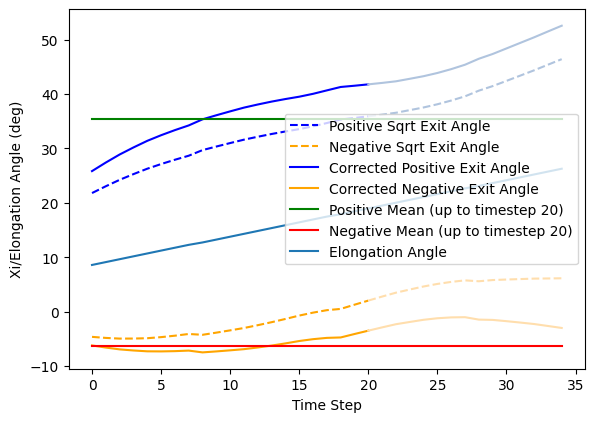

In [4]:
fig, axs = plt.subplots(figsize=(10/1.5,7/1.5))   
axs.plot(np.arange(0,35)[:maxImages+1],xiPrimePosArray[:maxImages+1], label='Positive Sqrt Exit Angle', color='blue', linestyle='dashed')
axs.plot(np.arange(0,35)[:maxImages+1],xiPrimeNegArray[:maxImages+1], label='Negative Sqrt Exit Angle', linestyle='dashed', color='orange') 
axs.plot(np.arange(0,35)[:maxImages+1],xiPosarray[:maxImages+1], label='Corrected Positive Exit Angle', linestyle='solid', color='blue')
axs.plot(np.arange(0,35)[:maxImages+1],xiNegarray[:maxImages+1], label='Corrected Negative Exit Angle', linestyle='solid', color='orange')

axs.plot(np.arange(0,35)[maxImages:],xiPrimePosArray[maxImages:], color='lightsteelblue', linestyle='dashed')
axs.plot(np.arange(0,35)[maxImages:],xiPrimeNegArray[maxImages:], linestyle='dashed', color='navajowhite') 
axs.plot(np.arange(0,35)[maxImages:],xiPosarray[maxImages:], linestyle='solid', color='lightsteelblue')
axs.plot(np.arange(0,35)[maxImages:],xiNegarray[maxImages:], linestyle='solid', color='navajowhite')

axs.plot(np.arange(0,35), np.full(35, posMean), label='Positive Mean (up to timestep 20)', color='green')
axs.plot(np.arange(0,35), np.full(35, negMean), label='Negative Mean (up to timestep 20)', color='red')
axs.plot(epsilonArray, label='Elongation Angle')
axs.set_ylabel('Xi/Elongation Angle (deg)')
axs.set_xlabel('Time Step')
axs.legend(loc='best') 
plt.show()

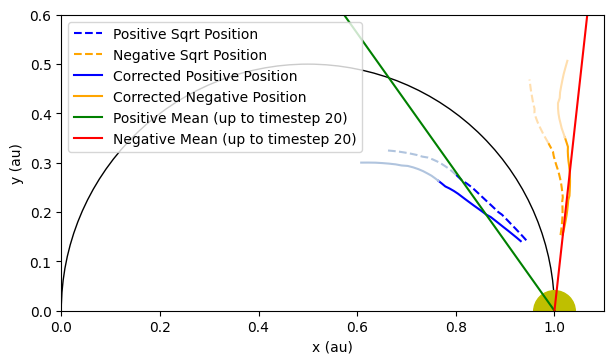

In [6]:
def calculatePositions(array, epsilonArray):
    positionArray = np.zeros((len(array),2))
    for i in range(len(array)):
        xi = array[i]
        epsilon = epsilonArray[i]
        cotXi = 1/np.tan(np.radians(xi))
        # print("cotXi = ", cotXi)
        tanE = np.tan(np.radians(epsilon))
        # print("tanE = ", tanE)
        x = cotXi/(tanE + cotXi)
        y = tanE*x
        positionArray[i] = np.array([x,y])
    
    return positionArray


fig, axs = plt.subplots(1,1, figsize=(7,7))
axs.plot(1,0, 'yo', markersize=30)

posPositionArray = calculatePositions(xiPrimePosArray, epsilonArray)
negPositionArray = calculatePositions(xiPrimeNegArray, epsilonArray)
posPositionArrayAdj = calculatePositions(xiPosarray, epsilonArray)
negPositionArrayAdj = calculatePositions(xiNegarray, epsilonArray)

np.save("output_compare_data/posPositionArray.npy", posPositionArray)
np.save("output_compare_data/negPositionArray.npy", negPositionArray)
np.save("output_compare_data/posPositionArrayAdj.npy", posPositionArrayAdj)
np.save("output_compare_data/negPositionArrayAdj.npy", negPositionArrayAdj)


axs.plot(posPositionArray[:maxImages+1,0],posPositionArray[:maxImages+1,1],color='blue', label='Positive Sqrt Position', linestyle='dashed')
axs.plot(negPositionArray[:maxImages+1,0],negPositionArray[:maxImages+1,1],color='orange', label='Negative Sqrt Position', linestyle='dashed')
axs.plot(posPositionArrayAdj[:maxImages+1,0],posPositionArrayAdj[:maxImages+1,1],color='blue', label='Corrected Positive Position', linestyle='solid')
axs.plot(negPositionArrayAdj[:maxImages+1,0],negPositionArrayAdj[:maxImages+1,1],color='orange', label='Corrected Negative Position', linestyle='solid')

axs.plot(posPositionArray[maxImages:,0],posPositionArray[maxImages:,1],color='lightsteelblue', linestyle='dashed')
axs.plot(negPositionArray[maxImages:,0],negPositionArray[maxImages:,1],color='navajowhite', linestyle='dashed')
axs.plot(posPositionArrayAdj[maxImages:,0],posPositionArrayAdj[maxImages:,1],color='lightsteelblue', linestyle='solid')
axs.plot(negPositionArrayAdj[maxImages:,0],negPositionArrayAdj[maxImages:,1],color='navajowhite', linestyle='solid')


axs.plot([1,1+np.cos(np.deg2rad(posMean+90))],[0,np.sin(np.deg2rad(posMean+90))], color = 'green', label='Positive Mean (up to timestep 20)')
axs.plot([1,1 +np.cos(np.deg2rad(negMean+90))],[0,np.sin(np.deg2rad(negMean+90))], color = 'red', label='Negative Mean (up to timestep 20)')

thomson = plt.Circle((0.5, 0), 0.5, color='k', fill=False)
axs.add_patch(thomson)
axs.set_aspect('equal')
axs.set_ylim(0,0.6)
axs.set_xlim(0,1.1)


axs.set_xlabel('x (au)')
axs.set_ylabel('y (au)')

axs.legend(loc='upper left')

plt.savefig("cme_correction_plot.png", dpi=300)

plt.show()
